`LoanData_clean.csv` is a data file about the loan status for the cutomers of a bank. We have several features collected from the customers along with their loan status which is 'Y' or 'N'. There are 10 features here that relate to customers. The last column in the data file is our target variable, which is what we're trying o predict by building a Machine Learning model.


|Col| Attribute name  |   Type	 |   Description|
|----|-----------------|---------|---------------|
|1|	Loan_ID     |       String	|Unique Loan ID (anonymous)|
|2|	Gender	   |        Cat	 |   Applicant gender ( Male or Female)|
|3|	Married	     |      Cat	 |   Applicant married? ( Y or N )|
|4|	Dependents	|       Num	 |   Number of dependents|
|5|	Education	 |      Cat	  |  Applicant education (Graduate or Undergraduate)|
|6|	Self_Employed|	   Cat	 |   Self employed? ( Y or N )|
|7|	ApplicantIncome	 |  Num	 |   Applicant income|
|8|	CoapplicantIncome | Num	  |  Coapplicant income|
|9|	LoanAmount	   |    Num	 |    Loan amount in thousands|
|10|  Credit_History	|   Cat	|     Credit history meets guidelines ( 1 or 0 )|
|11|Loan_Status|Cat|Target: Loan Approved? (Y or N)|

Before we build a model, we want to explore the data and examine the relationships between the features and the target (Loan_Status). Considering each and every single predictor, use an appropriate hypothesis test to decide whether a given feature is going to be useful in predicting the Loan Status. For every test, state the effect size as well and comment on the agreement/disagrement with the test output.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

data=pd.read_csv('LoanData_clean.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,LP002067,Male,Yes,1.0,Graduate,Yes,8666,4983.0,376.0,0.0,Rural,N
1,LP002180,Male,No,0.0,Graduate,Yes,6822,0.0,141.0,1.0,Rural,Y
2,LP001565,Male,Yes,1.0,Graduate,No,3089,1280.0,121.0,0.0,Semiurban,N
3,LP002743,Female,No,0.0,Graduate,No,2138,0.0,99.0,0.0,Semiurban,N
4,LP001514,Female,Yes,0.0,Graduate,No,2330,4486.0,100.0,1.0,Semiurban,Y


1) Gender
* $H_0:$ No association between the gender and the loan status
* $H_A$: There is an association between the two variables

In [2]:
chi2_associated=[]
#Using chi2_contingency
gender_loan=pd.crosstab(data.Gender, data.Loan_Status, margins=True)
observed=gender_loan.drop('All', axis=1).drop('All', axis=0)
expected=np.outer(gender_loan['All'][:2],gender_loan.loc['All'][:2])/gender_loan.loc['All', 'All']
expected=pd.DataFrame(expected, index=observed.index, columns=observed.columns)
test_stat, test_p, test_df, test_expected=stats.chi2_contingency(observed= observed, correction=False)
#Using critical value
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
critical_chi2 = stats.chi2.ppf(q = 0.95, df = test_df)
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=test_df)
print('Test statistic from the test        :',test_stat)
print('Test statsitic from the computation :',chi_squared_stat)
print('P value from the test               :',test_p)
print('P value from the computation        :',p_value)
print('Degrees of freedom                  :',test_df)
print('Expected values:')
print(test_expected)
if p_value<0.05:
    chi2_associated.append('Gender')

Test statistic from the test        : 0.36270288642832876
Test statsitic from the computation : 0.36270288642832876
P value from the test               : 0.5470089401598499
P value from the computation        : 0.5470089401598499
Degrees of freedom                  : 1
Expected values:
[[ 21.07258065  45.92741935]
 [ 95.92741935 209.07258065]]


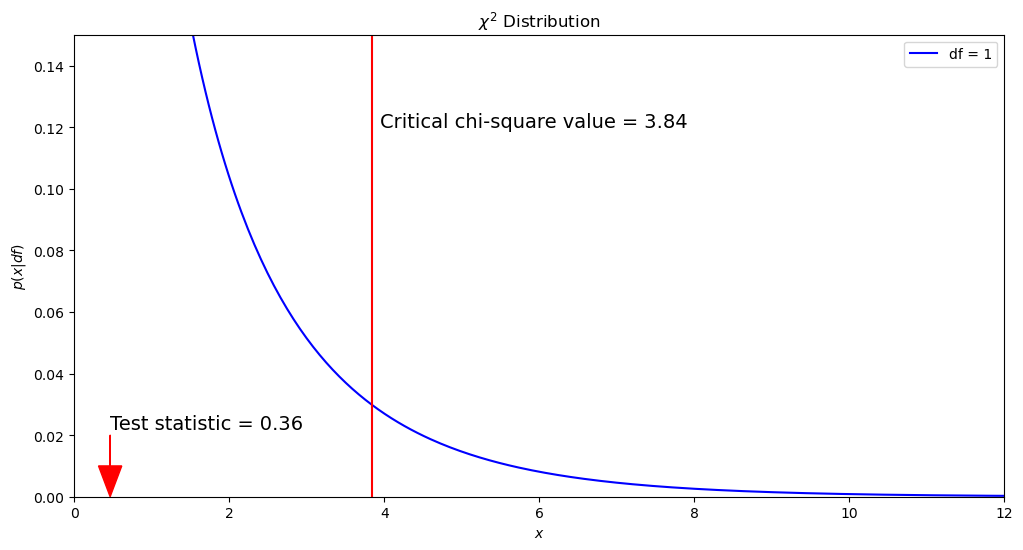

In [3]:
# Chi-square distribution
x = np.linspace (-1, 20, 500) 
plt.figure(figsize=(12, 6))
dist = stats.chi2(test_df)
plt.plot(x, dist.pdf(x), color='blue', label='df = {}'.format(test_df))
plt.axvline(critical_chi2, color='red')
plt.ylim([0,0.15])
plt.xlim([0,12])
plt.xlabel('$x$')
plt.ylabel(r'$p(x|df)$')
plt.title(r'$\chi^2\ \mathrm{Distribution}$')
plt.text(critical_chi2+0.1, 0.12, 'Critical chi-square value = {}'.format(np.round(critical_chi2,2)), fontsize='14')
plt.text(test_stat+0.1, 0.022, 'Test statistic = {}'.format(np.round(test_stat,2)), fontsize='14')
plt.arrow(test_stat+0.1, 0.02, 0., -0.01, fc="r", ec="r", head_width=0.3, head_length=0.01 )
plt.legend()
plt.show()

We have failed to reject H0. No association between the gender and the loan status

2) Maritual Status
* $H_0:$ No association between the maritual status and the loan status
* $H_A$: There is an association between the two variables

In [4]:
#Using chi2_contingency
Married_loan=pd.crosstab(data.Married, data.Loan_Status, margins=True)
observed=Married_loan.drop('All', axis=1).drop('All', axis=0)
expected=np.outer(Married_loan['All'][:2],Married_loan.loc['All'][:2])/Married_loan.loc['All', 'All']
expected=pd.DataFrame(expected, index=observed.index, columns=observed.columns)
test_stat, test_p, test_df, test_expected=stats.chi2_contingency(observed= observed, correction=False)
#Using critical value
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
critical_chi2 = stats.chi2.ppf(q = 0.95, df = test_df)
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=test_df)
print('Test statistic from the test        :',test_stat)
print('Test statsitic from the computation :',chi_squared_stat)
print('P value from the test               :',test_p)
print('P value from the computation        :',p_value)
print('Degrees of freedom                  :',test_df)
print('Expected values:')
print(test_expected)
if p_value<0.05:
    chi2_associated.append('Married')

Test statistic from the test        : 4.548300124410759
Test statsitic from the computation : 4.54830012441076
P value from the test               : 0.032951444824703496
P value from the computation        : 0.03295144482470347
Degrees of freedom                  : 1
Expected values:
[[ 39.94354839  87.05645161]
 [ 77.05645161 167.94354839]]


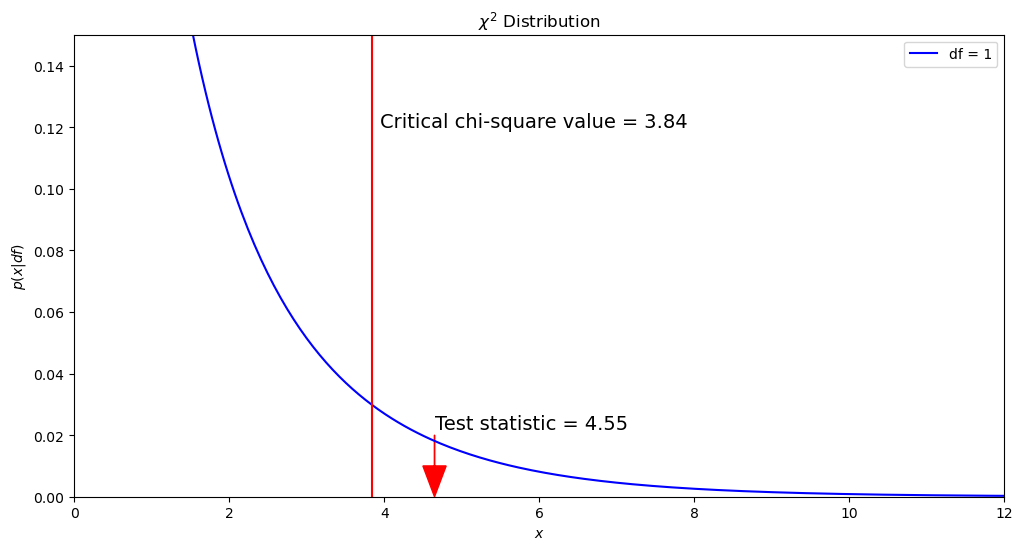

In [5]:
# Chi-square distribution
x = np.linspace (-1, 20, 500) 
plt.figure(figsize=(12, 6))
dist = stats.chi2(test_df)
plt.plot(x, dist.pdf(x), color='blue', label='df = {}'.format(test_df))
plt.axvline(critical_chi2, color='red')
plt.ylim([0,0.15])
plt.xlim([0,12])
plt.xlabel('$x$')
plt.ylabel(r'$p(x|df)$')
plt.title(r'$\chi^2\ \mathrm{Distribution}$')
plt.text(critical_chi2+0.1, 0.12, 'Critical chi-square value = {}'.format(np.round(critical_chi2,2)), fontsize='14')
plt.text(test_stat+0.1, 0.022, 'Test statistic = {}'.format(np.round(test_stat,2)), fontsize='14')
plt.arrow(test_stat+0.1, 0.02, 0., -0.01, fc="r", ec="r", head_width=0.3, head_length=0.01 )
plt.legend()
plt.show()

We have reject H0. There is an association between the maritual status and the loan status

3) Number of dependents
* $H_0:$ No association between number of dependents and the loan status
* $H_A$: There is an association between the two variables

In [6]:
#Using chi2_contingency
Dependents_loan=pd.crosstab(data.Dependents, data.Loan_Status, margins=True)
observed=Dependents_loan.drop('All', axis=1).drop('All', axis=0)
expected=np.outer(Dependents_loan['All'][:4],Dependents_loan.loc['All'][:2])/Dependents_loan.loc['All', 'All']
expected=pd.DataFrame(expected, index=observed.index, columns=observed.columns)
test_stat, test_p, test_df, test_expected=stats.chi2_contingency(observed= observed, correction=False)
#Using critical value
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
critical_chi2 = stats.chi2.ppf(q = 0.95, df = test_df)
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=test_df)
print('Test statistic from the test        :',test_stat)
print('Test statsitic from the computation :',chi_squared_stat)
print('P value from the test               :',test_p)
print('P value from the computation        :',p_value)
print('Degrees of freedom                  :',test_df)
print('Expected values:')
print(test_expected)
if p_value<0.05:
    chi2_associated.append('Dependents')

Test statistic from the test        : 2.9016531398884347
Test statsitic from the computation : 2.9016531398884347
P value from the test               : 0.4070381923265428
P value from the computation        : 0.4070381923265428
Degrees of freedom                  : 3
Expected values:
[[ 68.25       148.75      ]
 [ 19.81451613  43.18548387]
 [ 20.12903226  43.87096774]
 [  8.80645161  19.19354839]]


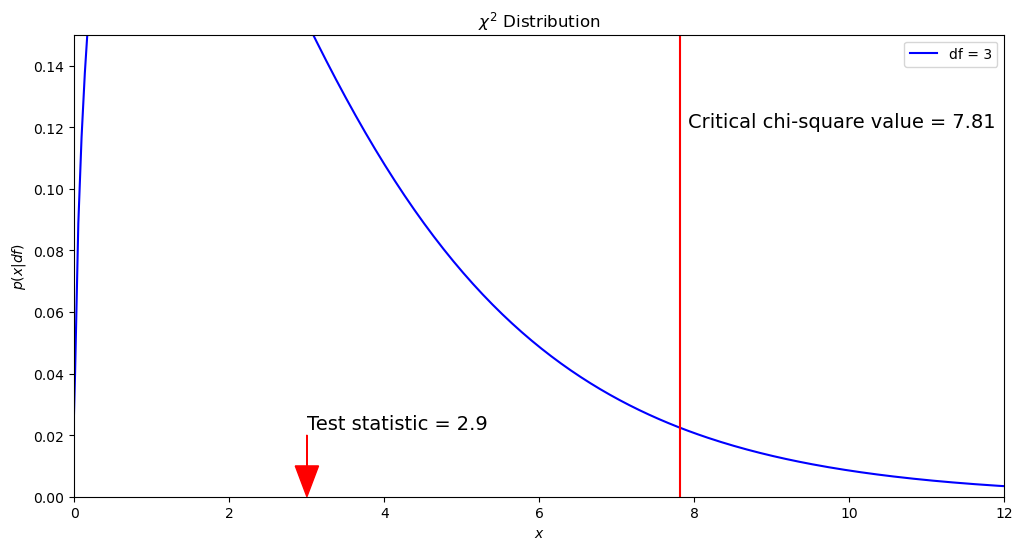

In [7]:
# Chi-square distribution
x = np.linspace (-1, 20, 500) 
plt.figure(figsize=(12, 6))
dist = stats.chi2(test_df)
plt.plot(x, dist.pdf(x), color='blue', label='df = {}'.format(test_df))
plt.axvline(critical_chi2, color='red')
plt.ylim([0,0.15])
plt.xlim([0,12])
plt.xlabel('$x$')
plt.ylabel(r'$p(x|df)$')
plt.title(r'$\chi^2\ \mathrm{Distribution}$')
plt.text(critical_chi2+0.1, 0.12, 'Critical chi-square value = {}'.format(np.round(critical_chi2,2)), fontsize='14')
plt.text(test_stat+0.1, 0.022, 'Test statistic = {}'.format(np.round(test_stat,2)), fontsize='14')
plt.arrow(test_stat+0.1, 0.02, 0., -0.01, fc="r", ec="r", head_width=0.3, head_length=0.01 )
plt.legend()
plt.show()

We have failed to reject H0. No association between the number of dependents and the loan status

4) Education Level
* $H_0:$ No association between education and the loan status
* $H_A$: There is an association between the two variables

In [8]:
#Using chi2_contingency
Education_loan=pd.crosstab(data.Education, data.Loan_Status, margins=True)
observed=Education_loan.drop('All', axis=1).drop('All', axis=0)
expected=np.outer(Education_loan['All'][:2],Education_loan.loc['All'][:2])/Education_loan.loc['All', 'All']
expected=pd.DataFrame(expected, index=observed.index, columns=observed.columns)
test_stat, test_p, test_df, test_expected=stats.chi2_contingency(observed= observed, correction=False)
#Using critical value
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
critical_chi2 = stats.chi2.ppf(q = 0.95, df = test_df)
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=test_df)
print('Test statistic from the test        :',test_stat)
print('Test statsitic from the computation :',chi_squared_stat)
print('P value from the test               :',test_p)
print('P value from the computation        :',p_value)
print('Degrees of freedom                  :',test_df)
print('Expected values:')
print(test_expected)
if p_value<0.05:
    chi2_associated.append('Education')

Test statistic from the test        : 0.04121890422719471
Test statsitic from the computation : 0.04121890422719471
P value from the test               : 0.8391159662361967
P value from the computation        : 0.8391159662361967
Degrees of freedom                  : 1
Expected values:
[[ 93.72580645 204.27419355]
 [ 23.27419355  50.72580645]]


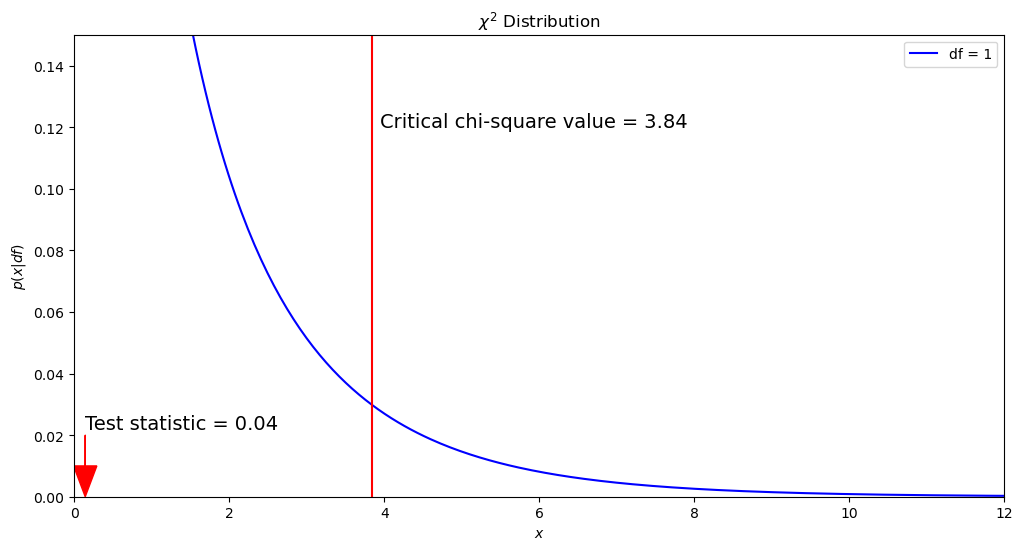

In [9]:
# Chi-square distribution
x = np.linspace (-1, 20, 500) 
plt.figure(figsize=(12, 6))
dist = stats.chi2(test_df)
plt.plot(x, dist.pdf(x), color='blue', label='df = {}'.format(test_df))
plt.axvline(critical_chi2, color='red')
plt.ylim([0,0.15])
plt.xlim([0,12])
plt.xlabel('$x$')
plt.ylabel(r'$p(x|df)$')
plt.title(r'$\chi^2\ \mathrm{Distribution}$')
plt.text(critical_chi2+0.1, 0.12, 'Critical chi-square value = {}'.format(np.round(critical_chi2,2)), fontsize='14')
plt.text(test_stat+0.1, 0.022, 'Test statistic = {}'.format(np.round(test_stat,2)), fontsize='14')
plt.arrow(test_stat+0.1, 0.02, 0., -0.01, fc="r", ec="r", head_width=0.3, head_length=0.01 )
plt.legend()
plt.show()

We have failed to reject H0. No association between the education level and the loan status

5) Being Self Employed
* $H_0:$ No association between being self-employed and the loan status
* $H_A$: There is an association between the two variables

In [10]:
#Using chi2_contingency
Self_Employed_loan=pd.crosstab(data.Self_Employed, data.Loan_Status, margins=True)
observed=Self_Employed_loan.drop('All', axis=1).drop('All', axis=0)
expected=np.outer(Self_Employed_loan['All'][:2],Self_Employed_loan.loc['All'][:2])/Self_Employed_loan.loc['All', 'All']
expected=pd.DataFrame(expected, index=observed.index, columns=observed.columns)
test_stat, test_p, test_df, test_expected=stats.chi2_contingency(observed= observed, correction=False)
#Using critical value
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
critical_chi2 = stats.chi2.ppf(q = 0.95, df = test_df)
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=test_df)
print('Test statistic from the test        :',test_stat)
print('Test statsitic from the computation :',chi_squared_stat)
print('P value from the test               :',test_p)
print('P value from the computation        :',p_value)
print('Degrees of freedom                  :',test_df)
print('Expected values:')
print(test_expected)
if p_value<0.05:
    chi2_associated.append('Self_Employed')

Test statistic from the test        : 0.00535557020239796
Test statsitic from the computation : 0.00535557020239796
P value from the test               : 0.9416614797571728
P value from the computation        : 0.9416614797571728
Degrees of freedom                  : 1
Expected values:
[[102.21774194 222.78225806]
 [ 14.78225806  32.21774194]]


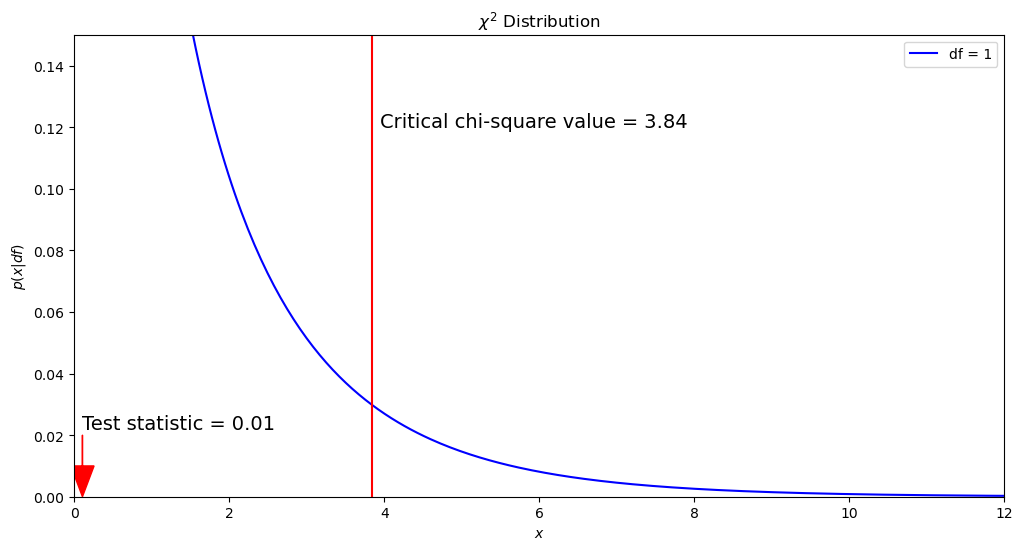

In [11]:
# Chi-square distribution
x = np.linspace (-1, 20, 500) 
plt.figure(figsize=(12, 6))
dist = stats.chi2(test_df)
plt.plot(x, dist.pdf(x), color='blue', label='df = {}'.format(test_df))
plt.axvline(critical_chi2, color='red')
plt.ylim([0,0.15])
plt.xlim([0,12])
plt.xlabel('$x$')
plt.ylabel(r'$p(x|df)$')
plt.title(r'$\chi^2\ \mathrm{Distribution}$')
plt.text(critical_chi2+0.1, 0.12, 'Critical chi-square value = {}'.format(np.round(critical_chi2,2)), fontsize='14')
plt.text(test_stat+0.1, 0.022, 'Test statistic = {}'.format(np.round(test_stat,2)), fontsize='14')
plt.arrow(test_stat+0.1, 0.02, 0., -0.01, fc="r", ec="r", head_width=0.3, head_length=0.01 )
plt.legend()
plt.show()

We have failed to reject H0. No association between being self-employed and the loan status

6) Credit History
* $H_0:$ No association between credit history and the loan status
* $H_A$: There is an association between the two variables

In [12]:
#Using chi2_contingency
Credit_History_loan=pd.crosstab(data.Credit_History, data.Loan_Status, margins=True)
observed=Credit_History_loan.drop('All', axis=1).drop('All', axis=0)
expected=np.outer(Credit_History_loan['All'][:2],Credit_History_loan.loc['All'][:2])/Credit_History_loan.loc['All', 'All']
expected=pd.DataFrame(expected, index=observed.index, columns=observed.columns)
test_stat, test_p, test_df, test_expected=stats.chi2_contingency(observed= observed, correction=False)
#Using critical value
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
critical_chi2 = stats.chi2.ppf(q = 0.95, df = test_df)
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=test_df)
print('Test statistic from the test        :',test_stat)
print('Test statsitic from the computation :',chi_squared_stat)
print('P value from the test               :',test_p)
print('P value from the computation        :',p_value)
print('Degrees of freedom                  :',test_df)
print('Expected values:')
print(test_expected)
if p_value<0.05:
    chi2_associated.append('Credit_History')

Test statistic from the test        : 110.23849624253833
Test statsitic from the computation : 110.23849624253833
P value from the test               : 8.688286018756957e-26
P value from the computation        : 0.0
Degrees of freedom                  : 1
Expected values:
[[ 19.18548387  41.81451613]
 [ 97.81451613 213.18548387]]


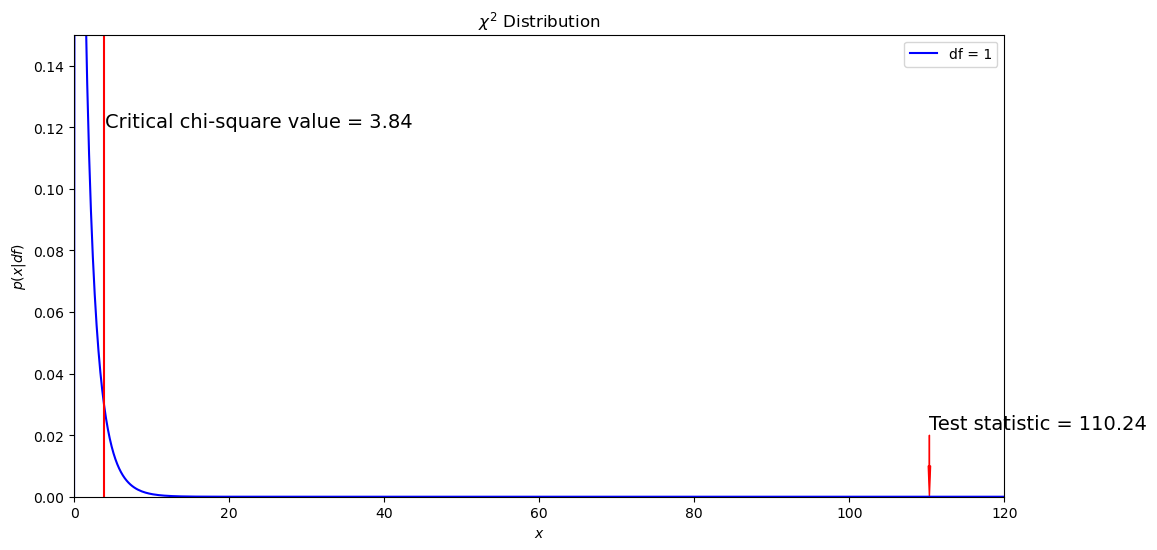

In [13]:
# Chi-square distribution
x = np.linspace (-1, 120, 500) 
plt.figure(figsize=(12, 6))
dist = stats.chi2(test_df)
plt.plot(x, dist.pdf(x), color='blue', label='df = {}'.format(test_df))
plt.axvline(critical_chi2, color='red')
plt.ylim([0,0.15])
plt.xlim([0,120])
plt.xlabel('$x$')
plt.ylabel(r'$p(x|df)$')
plt.title(r'$\chi^2\ \mathrm{Distribution}$')
plt.text(critical_chi2+0.1, 0.12, 'Critical chi-square value = {}'.format(np.round(critical_chi2,2)), fontsize='14')
plt.text(test_stat+0.1, 0.022, 'Test statistic = {}'.format(np.round(test_stat,2)), fontsize='14')
plt.arrow(test_stat+0.1, 0.02, 0., -0.01, fc="r", ec="r", head_width=0.3, head_length=0.01 )
plt.legend()
plt.show()

We have reject H0. There is an association between the credit history and the loan status

6) Property Area
* $H_0:$ No association between property area and the loan status
* $H_A$: There is an association between the two variables

In [14]:
#Using chi2_contingency
Property_Area_loan=pd.crosstab(data.Property_Area, data.Loan_Status, margins=True)
observed=Property_Area_loan.drop('All', axis=1).drop('All', axis=0)
expected=np.outer(Property_Area_loan['All'][:3],Property_Area_loan.loc['All'][:2])/Property_Area_loan.loc['All', 'All']
expected=pd.DataFrame(expected, index=observed.index, columns=observed.columns)
test_stat, test_p, test_df, test_expected=stats.chi2_contingency(observed= observed, correction=False)
#Using critical value
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
critical_chi2 = stats.chi2.ppf(q = 0.95, df = test_df)
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=test_df)
print('Test statistic from the test        :',test_stat)
print('Test statsitic from the computation :',chi_squared_stat)
print('P value from the test               :',test_p)
print('P value from the computation        :',p_value)
print('Degrees of freedom                  :',test_df)
print('Expected values:')
print(test_expected)
if p_value<0.05:
    chi2_associated.append('Property_Area')

Test statistic from the test        : 8.416621429776582
Test statsitic from the computation : 8.416621429776583
P value from the test               : 0.014871469282439924
P value from the computation        : 0.014871469282439875
Degrees of freedom                  : 2
Expected values:
[[33.96774194 74.03225806]
 [45.60483871 99.39516129]
 [37.42741935 81.57258065]]


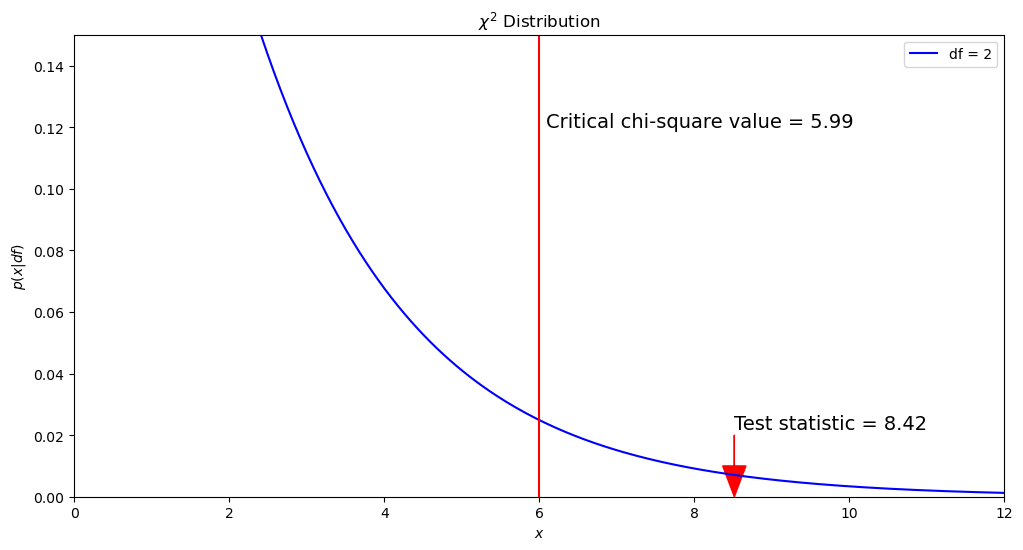

In [15]:
# Chi-square distribution
x = np.linspace (-1, 20, 500) 
plt.figure(figsize=(12, 6))
dist = stats.chi2(test_df)
plt.plot(x, dist.pdf(x), color='blue', label='df = {}'.format(test_df))
plt.axvline(critical_chi2, color='red')
plt.ylim([0,0.15])
plt.xlim([0,12])
plt.xlabel('$x$')
plt.ylabel(r'$p(x|df)$')
plt.title(r'$\chi^2\ \mathrm{Distribution}$')
plt.text(critical_chi2+0.1, 0.12, 'Critical chi-square value = {}'.format(np.round(critical_chi2,2)), fontsize='14')
plt.text(test_stat+0.1, 0.022, 'Test statistic = {}'.format(np.round(test_stat,2)), fontsize='14')
plt.arrow(test_stat+0.1, 0.02, 0., -0.01, fc="r", ec="r", head_width=0.3, head_length=0.01 )
plt.legend()
plt.show()

7) Total Income
* $H_0:$ Mean total income of the approved applicants is equal to the mean total income of the rejected applicants
* $H_A$: There is a significant difference.

First I am going to check if the data is normally distributed

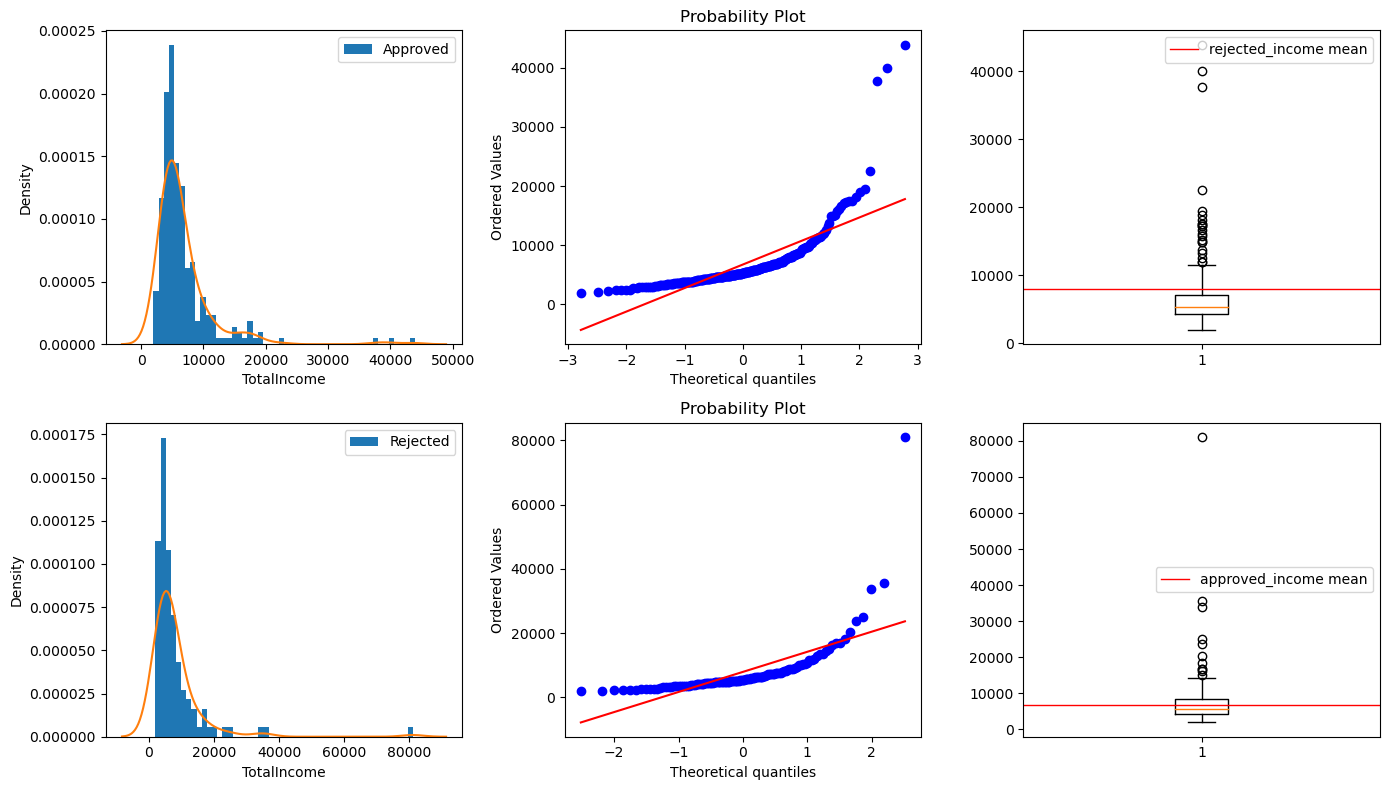

Approved Income data is a non-normal dist with a p value= 1.3215632917291093e-23
Rejected Income data is a non-normal dist with a p value= 3.487203624572984e-18


In [16]:
twott=[]

data['TotalIncome']=data['ApplicantIncome']+data['CoapplicantIncome']

approved_income=data[data['Loan_Status']=='Y']['TotalIncome']
rejected_income=data[data['Loan_Status']=='N']['TotalIncome']

plt.figure(figsize=(14,8))
plt.subplot(231)
plt.hist(approved_income, label='Approved', bins=50, density=True) ; plt.legend()
sns.kdeplot(approved_income)
plt.subplot(232)
stats.probplot(approved_income, dist="norm", plot=plt)
plt.subplot(233)
plt.boxplot(approved_income)
plt.axhline(y=rejected_income.mean(), color='r', lw=1, label='rejected_income mean')
plt.legend(loc='best')
plt.subplot(234)
plt.hist(rejected_income, label='Rejected', bins=50, density=True) ; plt.legend()
sns.kdeplot(rejected_income)
plt.subplot(235)
stats.probplot(rejected_income, dist="norm", plot=plt)
plt.subplot(236)
plt.boxplot(rejected_income)
plt.axhline(y=approved_income.mean(), color='r', lw=1, label='approved_income mean')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

W_stat, p_value = stats.shapiro(approved_income)
if p_value > 0.05: 
    print('Approved Income data is a normal dist with a p value=', p_value)
else: 
    print('Approved Income data is a non-normal dist with a p value=', p_value)
    
W_stat, p_value = stats.shapiro(rejected_income)
if p_value > 0.05: 
    print('Rejected Income data is a normal dist with a p value=', p_value)
else: 
    print('Rejected Income data is a non-normal dist with a p value=', p_value)

The data seems heavily skewed to the right. Let's check if the variances are equal.
* $H_0:$ The variances of the datasets are equal
* $H_A:$ The variances of the datasets are not equal

In [17]:
L_stat, p_value=stats.levene(approved_income,rejected_income)
if p_value > 0.05: 
    print('The variances of the datasets are equal with a p value=', p_value)
else: 
    print('The variances of the datasets are not equal with a p value=', p_value)
print('There are',len(approved_income),'data points for the income of the approved applications')
print('There are',len(rejected_income),'data points for the income of the approved applications')

The variances of the datasets are not equal with a p value= 0.0472165554562384
There are 255 data points for the income of the approved applications
There are 117 data points for the income of the approved applications


We have rejected H0, therefore assumption of equal variances is not valid. Since I have more than enough data, I will do a 2 sample t-test with the Welch's correction.

In [18]:
t, p_twosided = stats.ttest_ind(approved_income, rejected_income, equal_var=False)
if p_twosided > 0.05: 
    print('There is no significant difference between the mean total income of the approved applicants and the mean total income of the rejected applicants with a p value=', p_twosided)
else: 
    print('There is a significant difference between the mean total income of the approved applicants and the mean total income of the rejected applicants with a p value=', p_twosided)
    twott.append('TotalIncome')

There is no significant difference between the mean total income of the approved applicants and the mean total income of the rejected applicants with a p value= 0.17496473777716998


8) Loan Amount
* $H_0:$ Mean Loan Amount of the approved applicants is equal to the mean total income of the rejected applicants
* $H_A$: There is a significant difference.

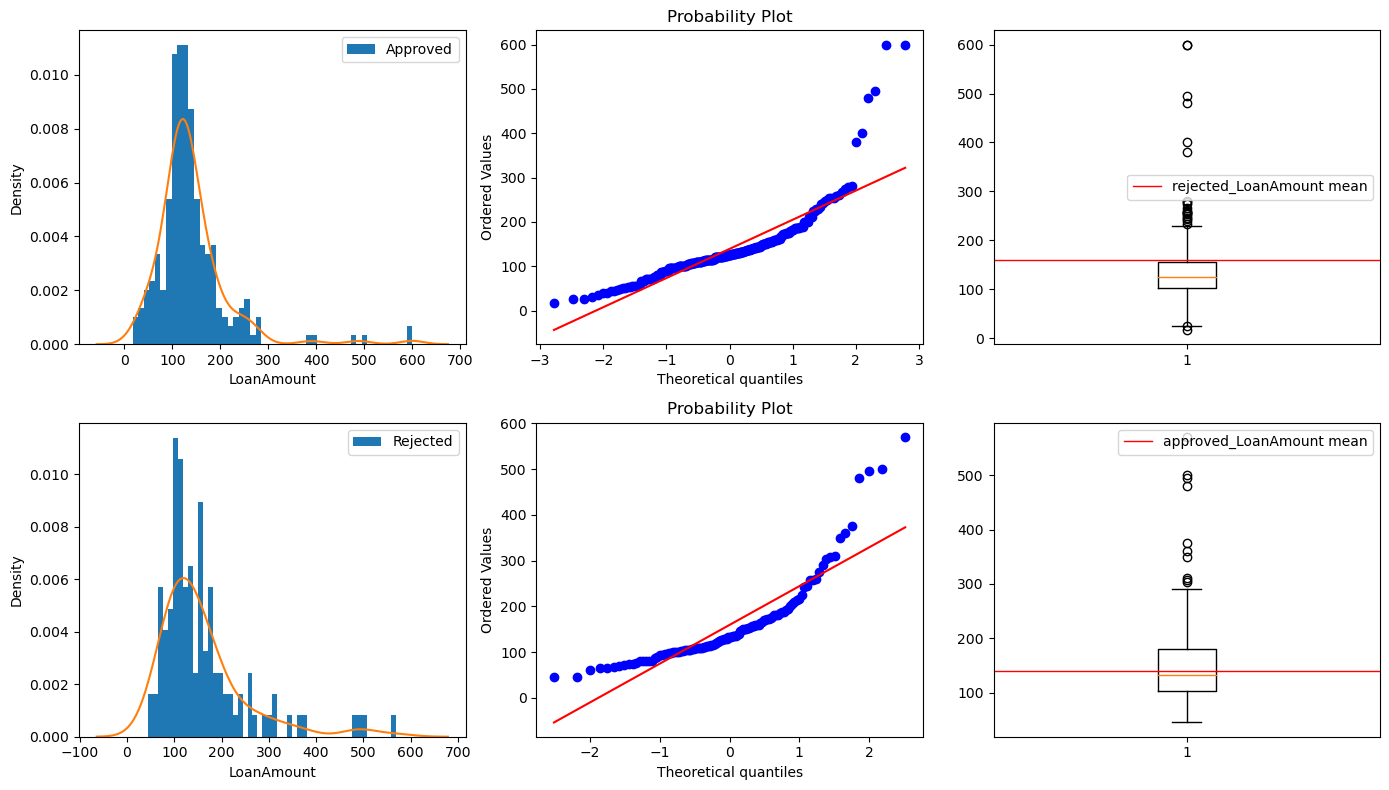

Approved LoanAmount data is a non-normal dist with a p value= 1.3215632917291093e-23
Rejected LoanAmount data is a non-normal dist with a p value= 3.487203624572984e-18


In [19]:
approved_LoanAmount=data[data['Loan_Status']=='Y']['LoanAmount']
rejected_LoanAmount=data[data['Loan_Status']=='N']['LoanAmount']

plt.figure(figsize=(14,8))
plt.subplot(231)
plt.hist(approved_LoanAmount, label='Approved', bins=50, density=True) ; plt.legend()
sns.kdeplot(approved_LoanAmount)
plt.subplot(232)
stats.probplot(approved_LoanAmount, dist="norm", plot=plt)
plt.subplot(233)
plt.boxplot(approved_LoanAmount)
plt.axhline(y=rejected_LoanAmount.mean(), color='r', lw=1, label='rejected_LoanAmount mean')
plt.legend(loc='best')
plt.subplot(234)
plt.hist(rejected_LoanAmount, label='Rejected', bins=50, density=True) ; plt.legend()
sns.kdeplot(rejected_LoanAmount)
plt.subplot(235)
stats.probplot(rejected_LoanAmount, dist="norm", plot=plt)
plt.subplot(236)
plt.boxplot(rejected_LoanAmount)
plt.axhline(y=approved_LoanAmount.mean(), color='r', lw=1, label='approved_LoanAmount mean')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

W_stat, p_value = stats.shapiro(approved_income)
if p_value > 0.05: 
    print('Approved LoanAmount data is a normal dist with a p value=', p_value)
else: 
    print('Approved LoanAmount data is a non-normal dist with a p value=', p_value)
    
W_stat, p_value = stats.shapiro(rejected_income)
if p_value > 0.05: 
    print('Rejected LoanAmount data is a normal dist with a p value=', p_value)
else: 
    print('Rejected LoanAmount data is a non-normal dist with a p value=', p_value)

In [20]:
L_stat, p_value=stats.levene(approved_LoanAmount,rejected_LoanAmount)
if p_value > 0.05: 
    print('The variances of the datasets are equal with a p value=', p_value)
else: 
    print('The variances of the datasets are not equal with a p value=', p_value)
print('There are',len(approved_LoanAmount),'data points for the income of the approved LoanAmount')
print('There are',len(rejected_LoanAmount),'data points for the income of the approved LoanAmount')

The variances of the datasets are not equal with a p value= 0.03045925103510521
There are 255 data points for the income of the approved LoanAmount
There are 117 data points for the income of the approved LoanAmount


In [21]:
t, p_twosided = stats.ttest_ind(approved_LoanAmount, rejected_LoanAmount, equal_var=False)
if p_twosided > 0.05: 
    print('There no a significant difference between the mean total income of the approved applicants and the mean total income of the rejected applicants with a p value=', p_twosided)
else: 
    print('There is a significant difference between the mean total income of the approved applicants and the mean total income of the rejected applicants with a p value=', p_twosided)
    twott.append('LoanAmount')

There is a significant difference between the mean total income of the approved applicants and the mean total income of the rejected applicants with a p value= 0.04159087915171308


## Results

In [22]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
def cohend(d1, d2):
    n1, n2 = len(d1), len(d2)                       # size of samples
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1) # variance of samples
    s = np.sqrt(((n1-1)*s1+(n2-1)*s2)/(n1+n2-2))    # pooled std dev
    u1, u2 = np.mean(d1), np.mean(d2)               # means of the samples
    return np.abs(u1 - u2) / s                      # effect size
cramers_dic={}
tt_dic={}
for i in chi2_associated:
    cramers_dic[i]=cramers_v(data['Loan_Status'], data[i])
for i in twott:
    tt_dic[i]=cohend(data[data['Loan_Status']=='Y'][i],data[data['Loan_Status']=='N'][i])
print('According to the Chi2 tests, following features are associated with loan approval:')
for i in chi2_associated:
    print('- ',i)
print("\nThe power of the correlation between these features and loan approval is measured using Craer's V Test. The coefficients are as follows:\n")
for i in cramers_dic:
    print(i,"\t:",cramers_dic[i])
print('\nAccording to the 2 sample t tests, following features are associated with loan approval:')
for i in twott:
    print('- ',i)
print("\nThe effect size of the the features is measured using Cohen's D Test. The effect sizes are as follows:\n")
for i in tt_dic:
    print(i,"\t:",tt_dic[i])

According to the Chi2 tests, following features are associated with loan approval:
-  Married
-  Credit_History
-  Property_Area

The power of the correlation between these features and loan approval is measured using Craer's V Test. The coefficients are as follows:

Married 	: 0.09077791752462117
Credit_History 	: 0.5347565573959586
Property_Area 	: 0.1314574857115456

According to the 2 sample t tests, following features are associated with loan approval:
-  LoanAmount

The effect size of the the features is measured using Cohen's D Test. The effect sizes are as follows:

LoanAmount 	: 0.24879756214691393


According to all these test, only credit history and LoanAmount (slightly) seem to be related with the loan approval. To be sure, I am going to use SelectKBest class of the scikit-learn library to select the best features.

In [23]:
data['Gender']=data['Gender'].map({'Male':0, 'Female':1})
data['Married']=data['Married'].map({'Yes':0, 'No':1})
data['Education']=data['Education'].map({'Not Graduate':0, 'Graduate':1})
data['Self_Employed']=data['Self_Employed'].map({'Yes':0, 'No':1})
data['Property_Area']=data['Property_Area'].map({'Rural':0, 'Urban':1, 'Semiurban':2})
data['Loan_Status']=data['Loan_Status'].map({'Y':0, 'N':1})
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP002067,0,0,1.0,1,0,8666,4983.0,376.0,0.0,0,1,13649.0
1,LP002180,0,1,0.0,1,0,6822,0.0,141.0,1.0,0,0,6822.0
2,LP001565,0,0,1.0,1,1,3089,1280.0,121.0,0.0,2,1,4369.0
3,LP002743,1,1,0.0,1,1,2138,0.0,99.0,0.0,2,1,2138.0
4,LP001514,1,0,0.0,1,1,2330,4486.0,100.0,1.0,2,0,6816.0


In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
columns_in_use=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'LoanAmount', 'Credit_History', 'Property_Area', 'TotalIncome']

X = data[columns_in_use]
y = data['Loan_Status']

test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(X, y)

np.set_printoptions(precision=3)
features = fit.transform(X)

columns=list(X.columns[fit.get_support()])
scores=list(fit.scores_[fit.get_support()])

print('The best features:')
for i,j in zip(columns, scores):
    print(f'{i}\t:{j}')

The best features:
LoanAmount	:228.37489259664255
Credit_History	:18.076742663426995
TotalIncome	:16129.672872127383


A popular ice cream store wants to know whether there is any dependency between the age of customers and their top-selling flavors of ice cream. A random sample of 149 customers' preferences are recorded and given in the accompanying file **`icecream-age-data.csv`**. Do you think that the data indicates any association between the  customer age and the ice cream flavor?

1. Do you think an ANOVA test could be used here? If yes, what does the test tell us?


2. If you were to use a Chi-square test of dependency here, how would you go about doing it? How does the conclusion of the test here compare with that of (1)? 

**1.Hypotheses of ANOVA:**<br>
* $H_0: x̄_V = x̄_C = x̄_Fy$
* $H_A$: At least one of the means is different

Let's compute F-statistic and the p-value to come to a conclusion:

In [25]:
data=pd.read_csv('icecream-age-data.csv', index_col='ID')
xV=data[data['IceCream']=='Vanilla']['Age']
xC=data[data['IceCream']=='Chocolate']['Age']
xF=data[data['IceCream']=='Fruity']['Age']

F, p = stats.f_oneway(xV, xC, xF)
if p > 0.05: 
    print('No difference between the mean ages with a p value=', p)
else: 
    print('Mean ages differ with a p value=', p)

No difference between the mean ages with a p value= 0.7889930041447051


The ANOVA test tells us that there is no difference in the mean ages of the people preferring different flavors of ice cream. If we want to go with a Chi-square test, we can compare the mean ages for the ice cream flavor preferred. For the Chi-square test:

**2.Hypotheses of Chi-square:**<br>
* $H_0:$ No association between the age and ice cream preference
* $H_A$: There is an association between the two variables

In [26]:
pivot=pd.pivot_table(data=data, index='IceCream', aggfunc='mean')['Age']
test_stat, test_p, test_df, test_expected=stats.chi2_contingency(observed= pivot)
if p > 0.05: 
    print('No association between the age and ice cream preference with a p value=', p)
else: 
    print('There is an association between the two variables with a p value=', p)

No association between the age and ice cream preference with a p value= 0.7889930041447051


Chi-square test draws the same conclusion.

Based on a time frame that is long enough, we know that our standard design (call it the STD) produces a CTR (click-through rate) of 10%. 

We want to come up with a new design (call it NEW) hoping that it will improve our CTR and generate more revenue.
The difference (MDE: minimum detectable effect) that we want to see is at least 2%.

1. Can you find the minimum sample size (per variant) needed to detect a 2% difference with a test power of 80%? There are many different ways of finding it. `statsmodels` has a bunch of different modules to do what you want. Please explore what's out there and choose one to find the minimum sample size. Assume $\alpha=0.05$.


2. A healthy A/B test is possible when certain conditions are met. One method of finding out everything will work out as intended is to conduct an A/A test: Comparing the same variants. Van you build a simulation to see if the false positive rate (seeing an efect when there is none) coming out of the simulation is in agreement with the significance level $\alpha$ of your choice?


3. Suppose, using the sample size you found in (1), you get the following table:

||Click|No click|
|----|----|-----|
STD|0.10|0.90|
NEW|0.12|0.80|

Based on these CTR values obtained at the end of the expeirment, can you calculate the test power with a simulation?

1)

In [27]:
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import ttest_power
# Assume the baseline CTR is 10% and the minimum detectable effect is 2%
baseline_ctr = 0.1
mde = 0.02

# Specify the alpha level and test power
alpha = 0.05
power = 0.8

# Create a TTestIndPower instance
power_calc = TTestIndPower()

# Calculate the minimum sample size needed per variant
min_sample_size = power_calc.solve_power(effect_size=mde, nobs1=None, alpha=alpha, power=power, ratio=1)

print(min_sample_size)

39245.263510769844


2)
Because of the central limit theorem, mean values I take from the populaton is going to be normally distributed no matter how the population distribution is. For the simulation I am going to draw samples from a population with a mean of 0.10 and a standart devition of 0.01.

In [40]:
from scipy.stats import ttest_ind
import numpy as np

sample_size = 1000
iters=1000
significant=0
for i in range(iters):
    data_A = np.random.normal(0.1, 0.01, sample_size)
    data_B = np.random.normal(0.1, 0.01, sample_size)
    _, p_value = ttest_ind(data_A, data_B)
    if p_value < 0.05:
        significant+=1
if significant > iters*0.05:
    print("The observed difference is statistically significant.")
    print('Number of trials with a p-value smaller than 0.05\t:',significant)
    print('Number of trials\t\t\t\t\t:',iters)
else:
    print("The observed difference is not statistically significant.")
    print('Number of trials with a p-value smaller than 0.05\t:',significant)
    print('Number of trials\t\t\t\t\t:',iters)

The observed difference is not statistically significant.
Number of trials with a p-value smaller than 0.05	: 45
Number of trials					: 1000


3) For this simulation I assume HA is actually true and the new design has CTR of 12%. I would fail to reject HO if the sample CTR rate I took was smaller than:

In [43]:
stats.norm(loc=0.1, scale=0.01).interval(0.95)[1]

0.11959963984540055

So I will make a simulation and check for the number of times where the CTR is smaller than 0.1196

In [54]:
sample_size = 39245.2/2

click      = round(0.12*sample_size)
no_click   = round(0.88*sample_size)
all_clicks = np.append(np.ones(click),np.zeros(no_click))

sim_critical=stats.norm(loc=0.1, scale=0.01).interval(0.95)[1]

iters=10000
samp_size=1000
hit=0

for i in range(iters):
    samp=np.random.choice(all_clicks, size=samp_size, replace=False)
    if samp.sum()/samp_size>sim_critical:
        hit+=1

typeII=hit/iters
print('The power of the test according to the simulation:',(1-typeII))
    

The power of the test according to the simulation: 0.47330000000000005
